In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import genfromtxt  
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

### Datasets

In [2]:
def load_iris():
    '''
    Returns a column of all petal lengths.
    '''
    X = genfromtxt("./data/iris.csv", delimiter=',', skip_header=1)
    X = X[:,2]
    X = X.reshape(-1,1)
    return X

def load_bdp():
    '''
    Returns a column of systolic and diastolic blood pressure values.
    '''
    Z = genfromtxt("./data/bdp.csv", delimiter=',', skip_header=1)
    n = Z.shape[0]
    X = np.zeros(2*n)
    X[:n] = Z[:,2]
    X[n:] = Z[:,3]
    X = X.reshape(-1,1)
    return X

def sample(pi, mu, std, n):
    '''
    Returns a column of n values drawn from a normal mixture model.
    
    Parameter
        pi  k mixing coefficients
        mu  k means
        std k standard deviations
        n   number of data points
        
    Return
        n data points randomly sampled from specified mixture. 
    '''
    y = np.random.choice(len(pi), size=n, p=pi)
    x = np.zeros((n,1))
    for i, comp in enumerate(y):
        x[i] = norm.rvs(mu[comp], std[comp])
    return x


### Examples

In [3]:
# generate n points from a mixture of fived normal distributions
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
samp = sample(pi, mu, std, n)

In [4]:
# load petal lengths of iris flowers
iris = load_iris()

In [5]:
# load blood pressures
bdp = load_bdp()

## Distribution of Data

### Iris data

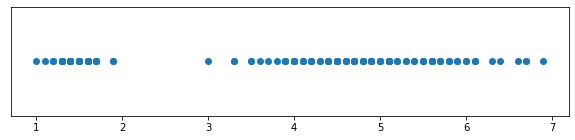

In [19]:
# show data
plt.subplots(figsize=(10,2))
plt.scatter(iris, np.zeros((len(iris),1)))
plt.yticks(())
plt.show()

### Blood preasure data

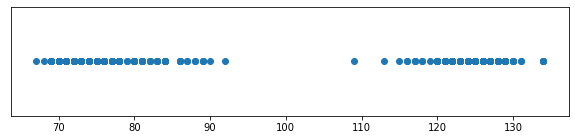

In [15]:
plt.subplots(figsize=(10,2))
plt.scatter(bdp, np.zeros((len(bdp),1)))
plt.yticks(())
plt.show()

### Sample data

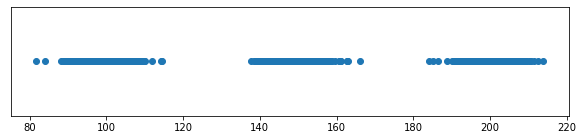

In [18]:
plt.subplots(figsize=(10,2))
plt.scatter(samp, np.zeros((len(samp),1)))
plt.yticks(())
plt.show()

## Iris Dataset


599.0256713829931


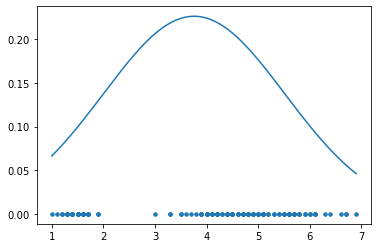

604.8790965767163


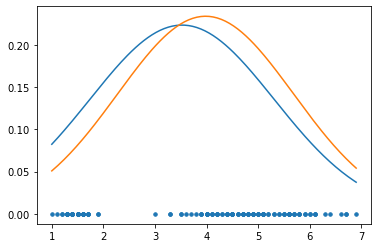

610.8778828641604


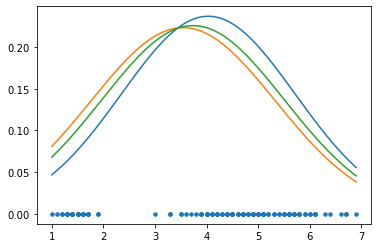

616.9556089989085


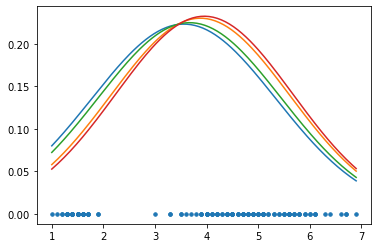

622.9349522562723


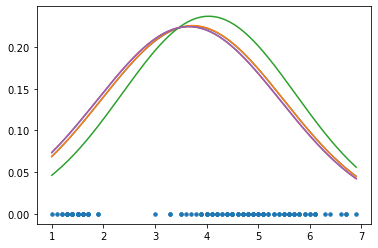

628.9314889003131


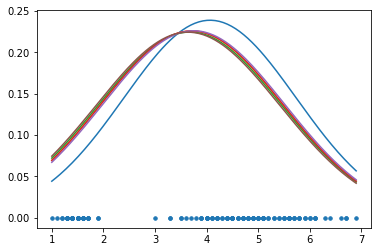

634.9507520775605


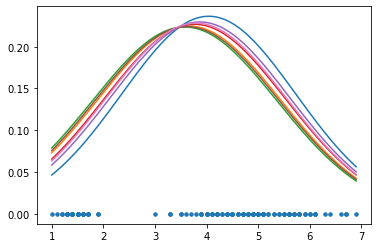

640.9775940145223


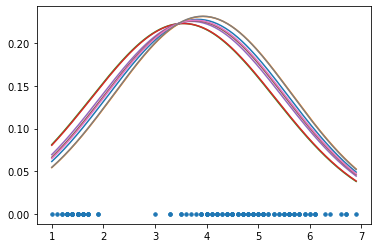

646.9684270720581


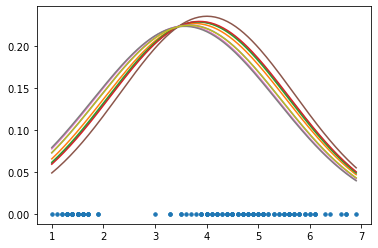

652.9482721758858


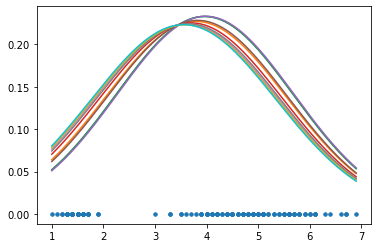

658.955642877218


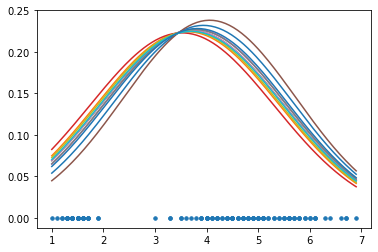

664.952476647446


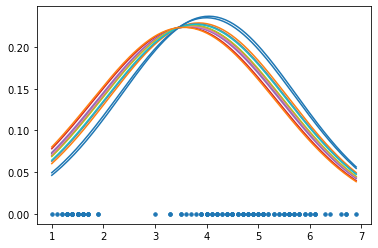

670.954146108656


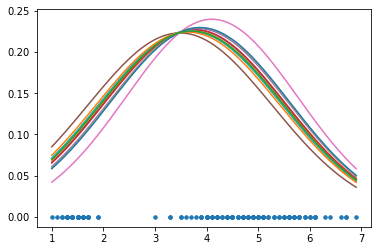

676.9679894898331


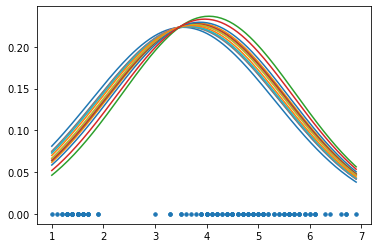

682.965598738547


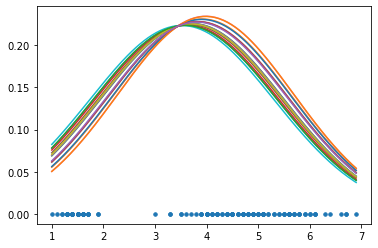

Smallest AIC (Iris): 599.03


In [24]:
iris = load_iris()

aic = []

x_axis = np.linspace(np.min(iris), np.max(iris), iris.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'random', random_state = 42, reg_covar = 1e-2)
    gm.fit(iris)
    aic_iris = gm.aic(iris)
    print(aic_iris)
    aic.append(aic_iris)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(iris, np.zeros((len(iris), 1)), s=12)
    plt.show();

print(f'Smallest AIC (Iris): {min(aic):.2f}')

Change init_params to kmeans to improve the results of vanilla EM Algorithm:

599.0256713829931


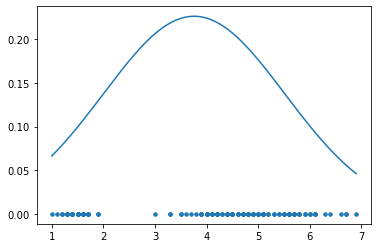

413.02924652878994


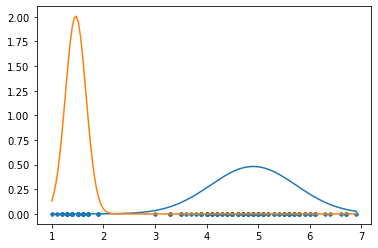

417.54235979120483


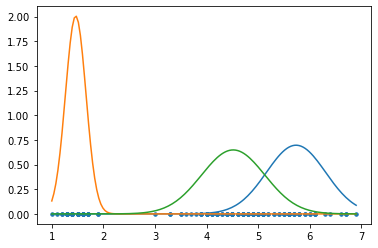

423.64291408782304


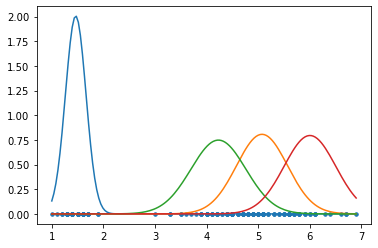

426.2169225341678


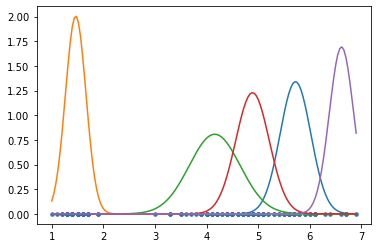

431.1824230969952


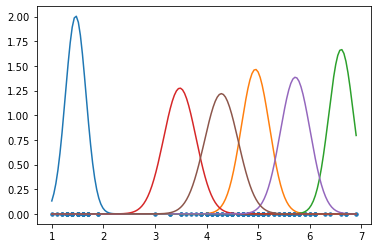

435.8616470555621


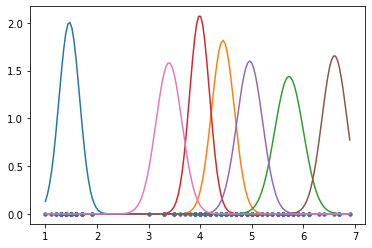

440.87794460845646


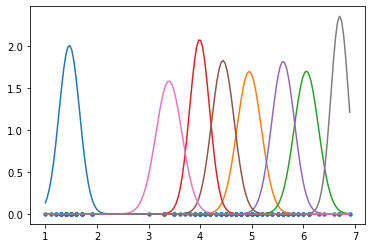

445.71759993293915


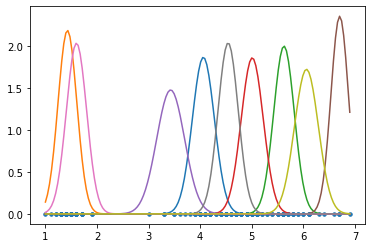

451.2457830563611


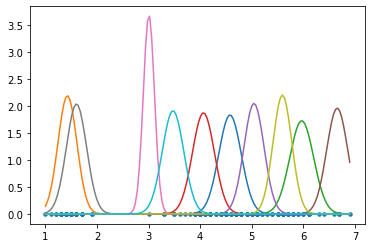

457.26743899271696


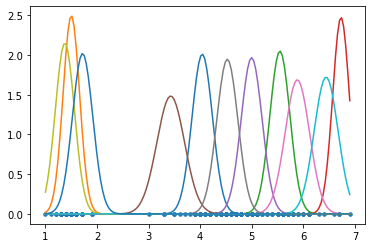

462.567647420209


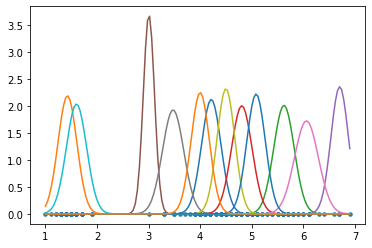

468.07860904953895


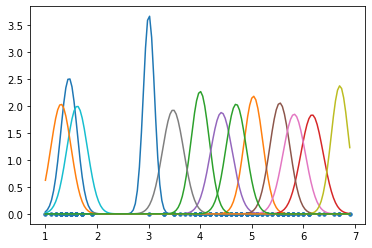

474.01972776443716


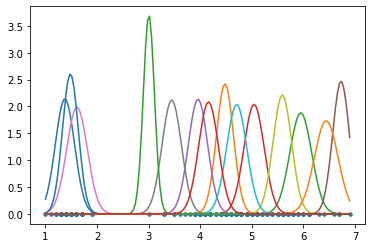

479.69973098809214


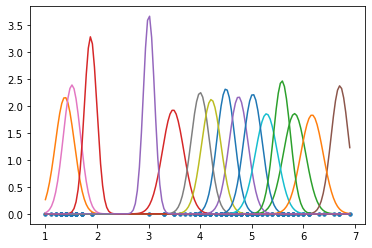

Smallest AIC (Iris): 413.03


In [25]:
iris = load_iris()

aic = []

x_axis = np.linspace(np.min(iris), np.max(iris), iris.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'kmeans', random_state = 42, reg_covar = 1e-2)
    gm.fit(iris)
    aic_iris = gm.aic(iris)
    print(aic_iris)
    aic.append(aic_iris)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(iris, np.zeros((len(iris), 1)), s=12)
    plt.show();

print(f'Smallest AIC (Iris): {min(aic):.2f}')

## Blood Preasure Dataset

2790.406016108953


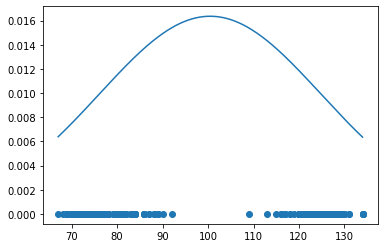

2796.403076282766


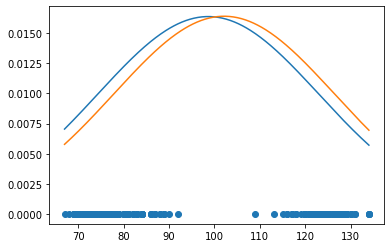

2802.403541087875


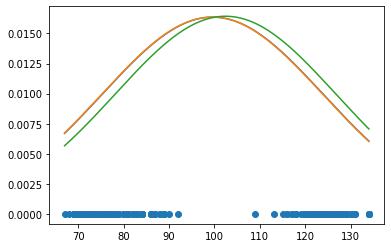

2808.402906039266


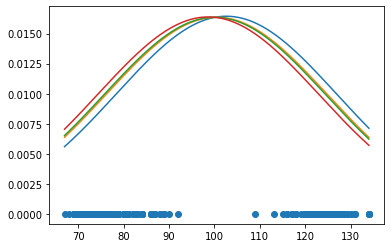

2814.404068628753


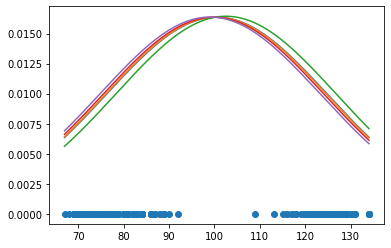

2820.403604815775


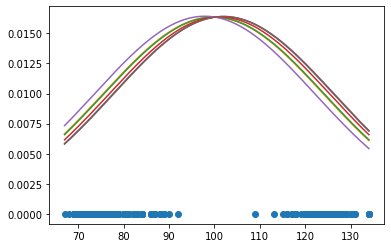

2826.4010258042754


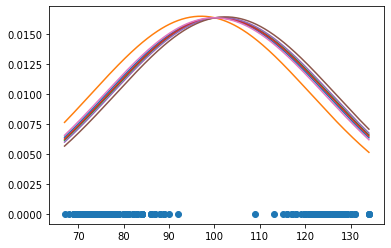

2832.402659228186


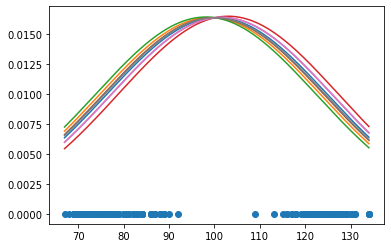

2838.403143300303


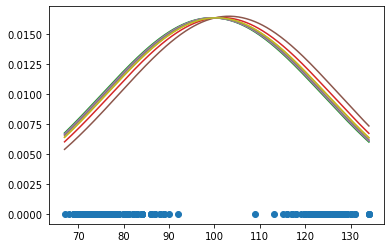

2844.4024767393116


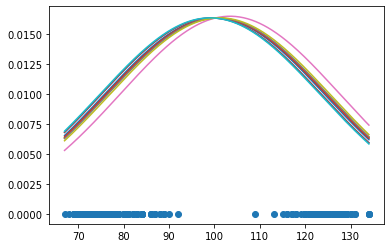

2850.4039507463976


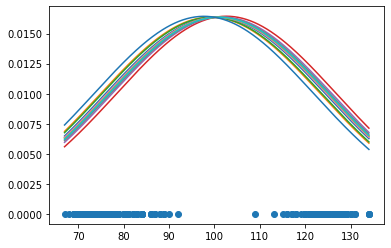

2856.4033579704655


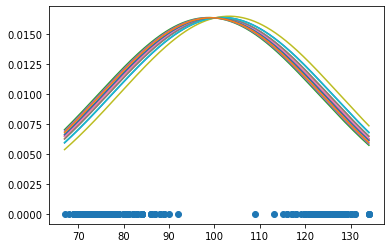

2862.403462820764


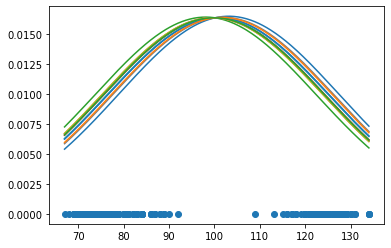

2868.4042839882904


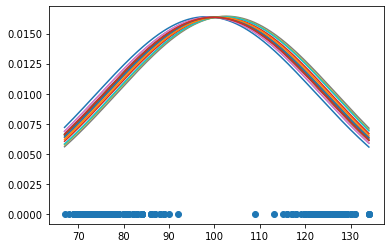

2874.4035263708847


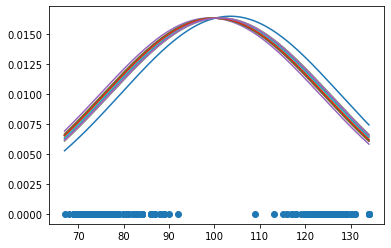

Smallest AIC (BDP): 2790.41


In [26]:
bdp = load_bdp()
aic = []

x_axis = np.linspace(np.min(bdp), np.max(bdp), bdp.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, random_state=32, init_params = 'random', reg_covar = 1e-2)
    gm.fit(bdp)
    aic_bdp = gm.aic(bdp)
    print(aic_bdp)
    aic.append(aic_bdp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(bdp, np.zeros((len(bdp), 1)))
    plt.show();
    
print(f'Smallest AIC (BDP): {min(aic):.2f}')

Change init_params to kmeans to improve the results of EM Algorithm:

2790.406016108953


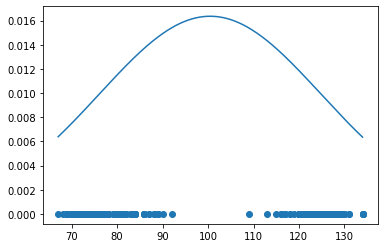

2203.913234139551


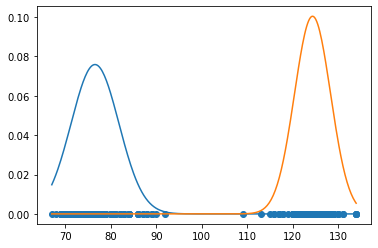

2187.8111362565587


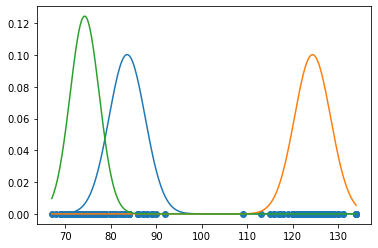

2185.3706749743496


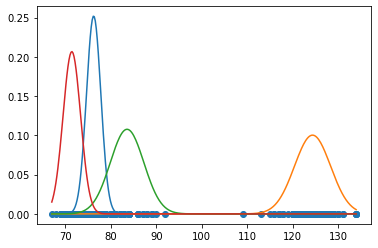

2186.03172339275


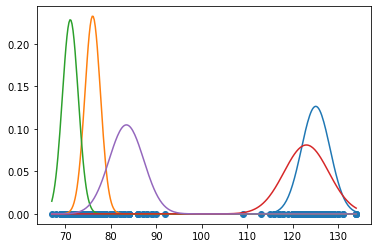

2169.686118480943


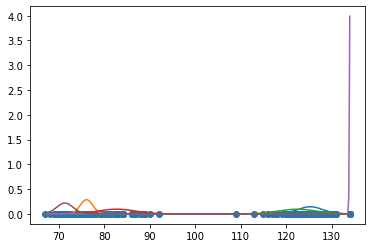

2166.5495559227347


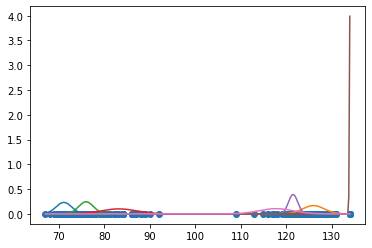

2160.796620004351


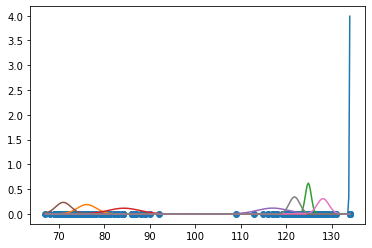

2162.07251220176


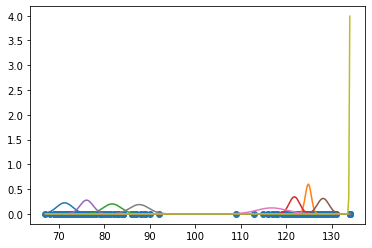

2159.930137765164


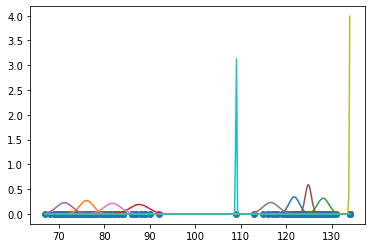

2107.1777827052674


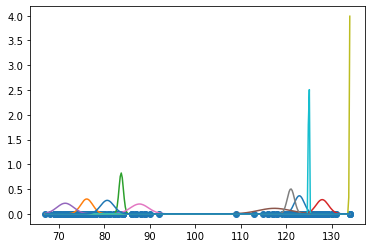

2110.4023118556547


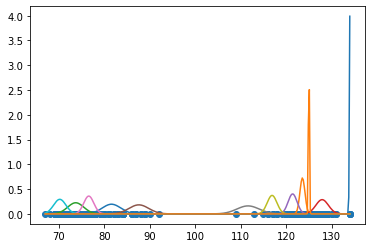

2110.20995295382


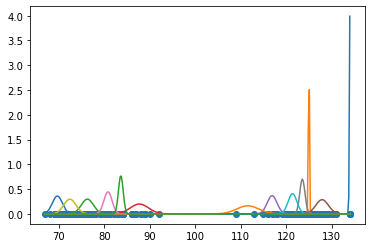

2098.8839681602167


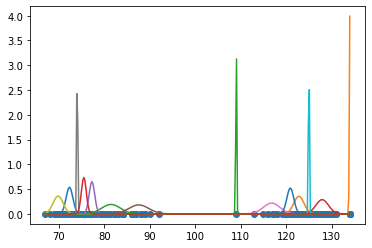

2063.7677133941693


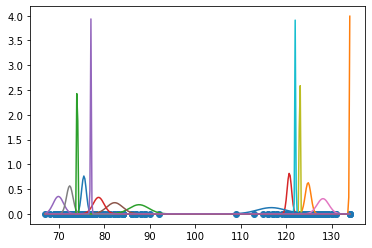

Smallest AIC (BDP): 2063.77


In [27]:
bdp = load_bdp()
aic = []

x_axis = np.linspace(np.min(bdp), np.max(bdp), bdp.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, random_state=32, init_params = 'kmeans', reg_covar = 1e-2)
    gm.fit(bdp)
    aic_bdp = gm.aic(bdp)
    print(aic_bdp)
    aic.append(aic_bdp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(bdp, np.zeros((len(bdp), 1)))
    plt.show();
    
print(f'Smallest AIC (BDP): {min(aic):.2f}')

## Sample Dataset

In [9]:
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
samp = sample(pi, mu, std, n)

10272.92592715348


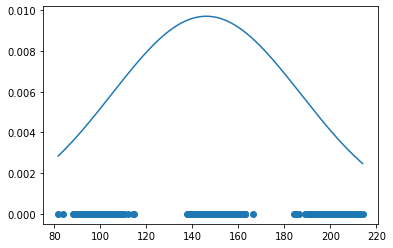

10278.902434766447


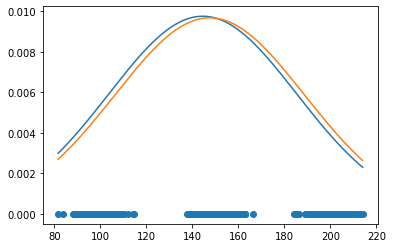

10284.906996317666


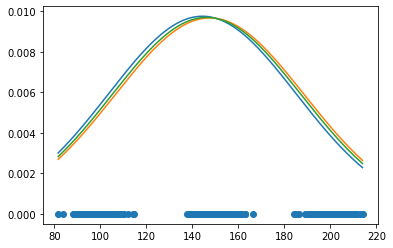

10290.901119519413


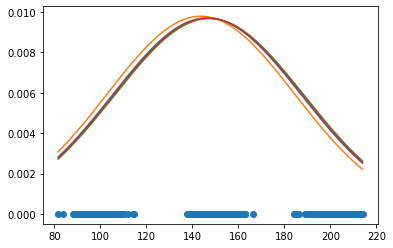

10296.908250891353


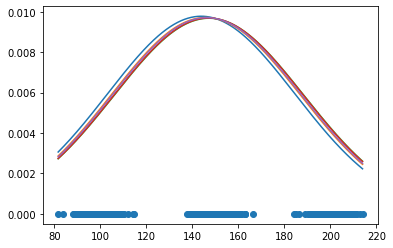

10302.903765997162


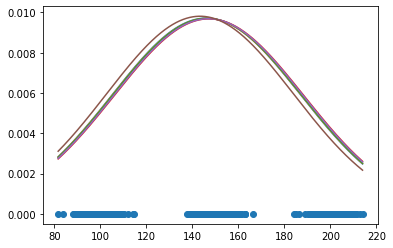

10308.903339844455


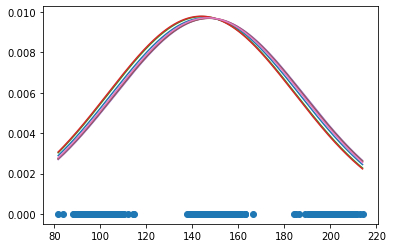

10314.90194146086


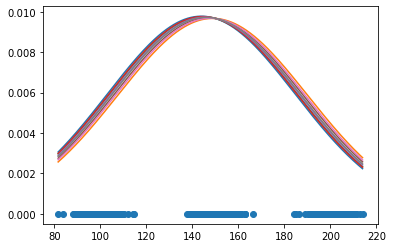

10320.904177145767


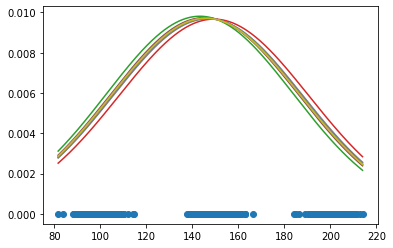

10326.90946269015


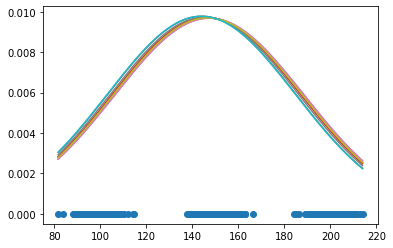

10332.906386904226


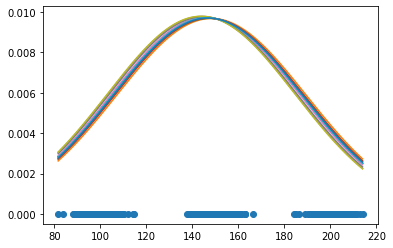

10338.911903177923


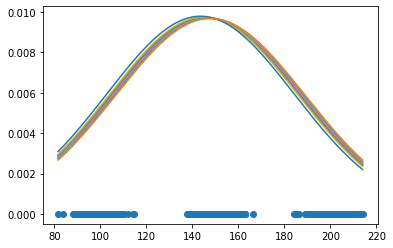

10344.909239217288


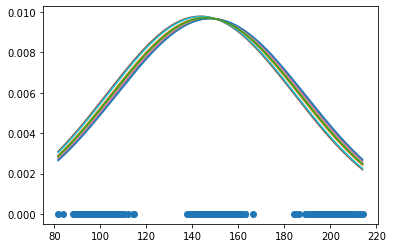

10350.911534955914


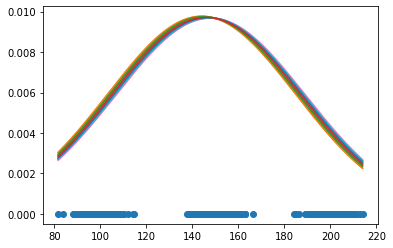

10356.913553109638


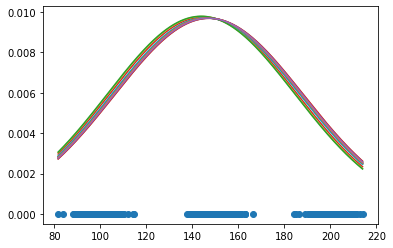

Smallest AIC (Sample): 10272.93


In [28]:
x_axis = np.linspace(np.min(samp), np.max(samp), samp.shape[0])
aic = []

for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'random', random_state = 42, reg_covar = 1e-2)
    gm.fit(samp)
    aic_samp = gm.aic(samp)
    print(aic_samp)
    aic.append(aic_samp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(samp, np.zeros((len(samp), 1)))
    plt.show();
    
print(f'Smallest AIC (Sample): {min(aic):.2f}')

Change init_params to kmeans to improve the Results of EM Algorithm:

10272.92592715348


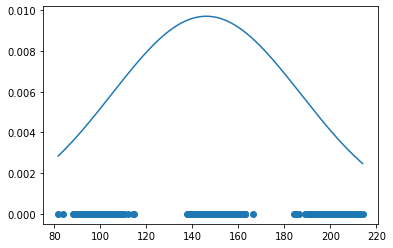

9438.715323902748


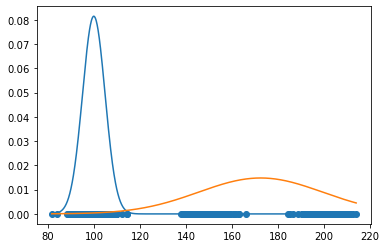

8277.051320021536


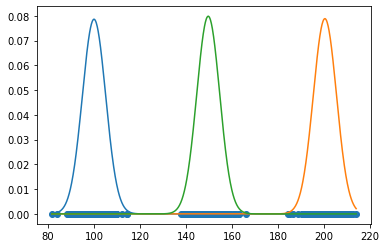

8282.65961541608


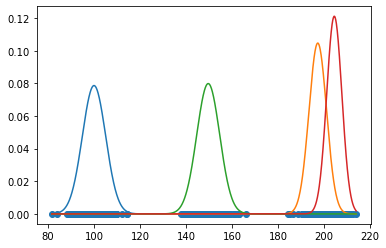

8285.74021421417


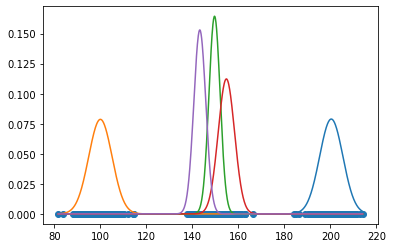

8290.351144825807


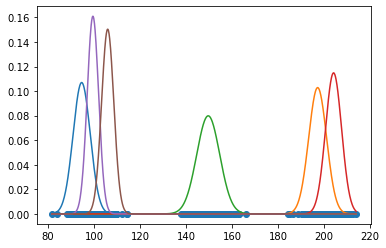

8293.119868123904


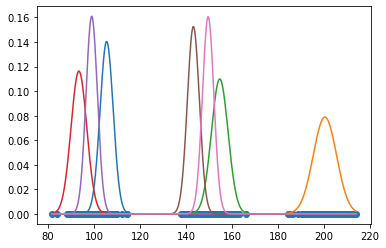

8297.956724570548


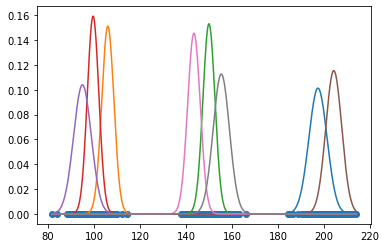

8300.736645298879


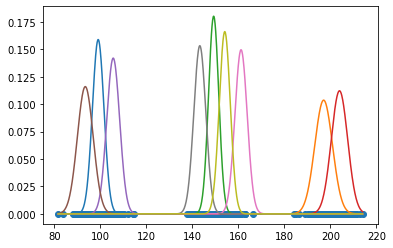

8287.156281032361


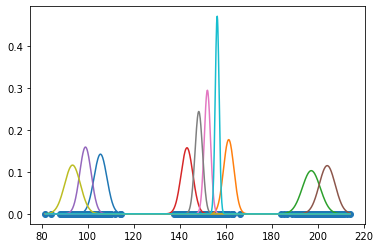

8292.397068893672


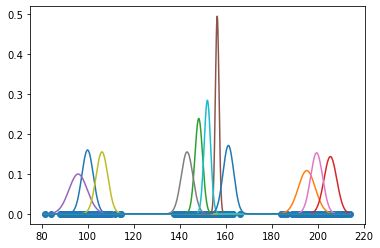

8294.908077158114


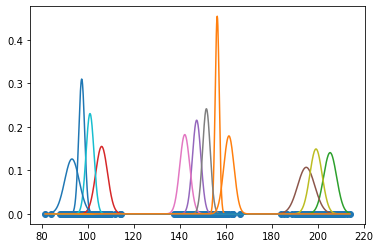

8293.73435611075


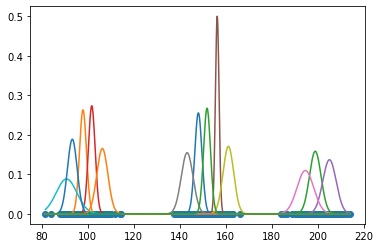

8294.55772945719


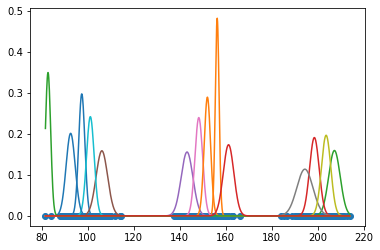

8298.647161327051


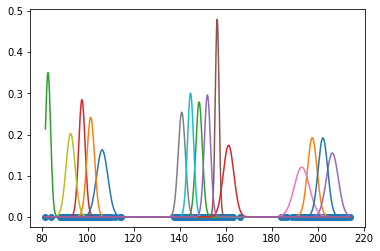

Smallest AIC (Sample): 8277.05


In [29]:
x_axis = np.linspace(np.min(samp), np.max(samp), samp.shape[0])
aic = []

for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'kmeans', random_state = 42, reg_covar = 1e-2)
    gm.fit(samp)
    aic_samp = gm.aic(samp)
    print(aic_samp)
    aic.append(aic_samp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(samp, np.zeros((len(samp), 1)))
    plt.show();
    
print(f'Smallest AIC (Sample): {min(aic):.2f}')